<a href="https://colab.research.google.com/github/ErigiVaishnavi/Machine_Learning/blob/main/Lab_Assignment3_20bcs044.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1.Write python code to compress image using Singular Value Decomposition


---
  download image using https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg



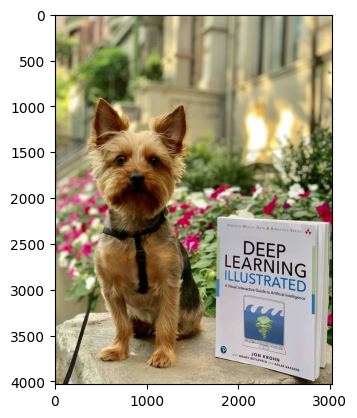

In [2]:
from PIL import Image
img = Image.open('/content/oboe-with-book.jpg')
_ = plt.imshow(img)

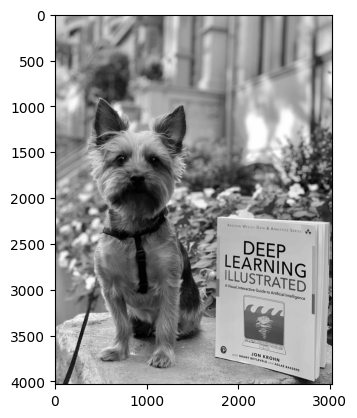

In [3]:
imggray=img.convert("LA")
_ = plt.imshow(imggray)

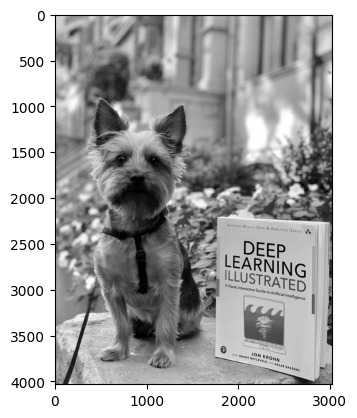

In [4]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [5]:
U, sigma, V = np.linalg.svd(imgmat)  # Performing SVD on the image array

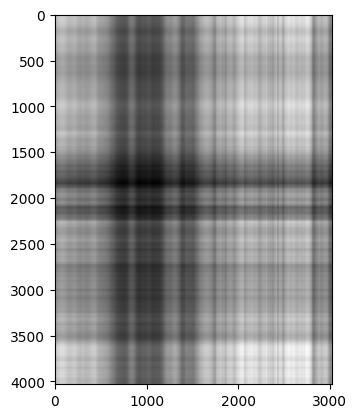

In [6]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

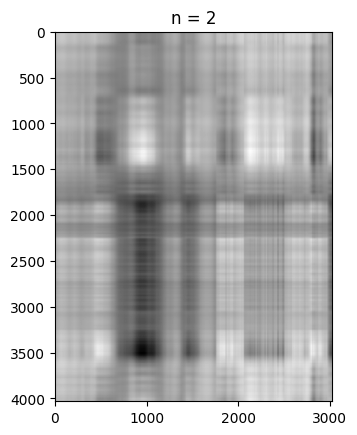

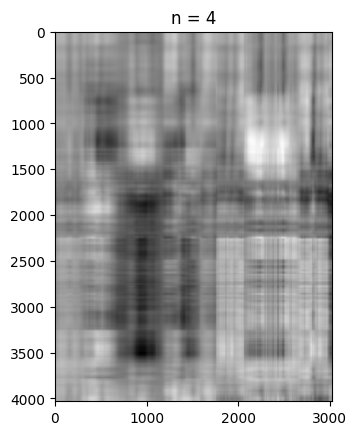

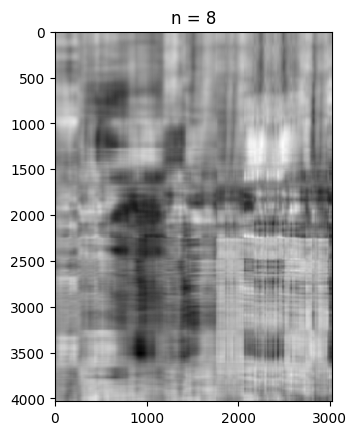

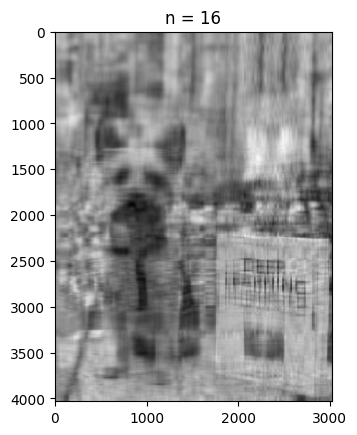

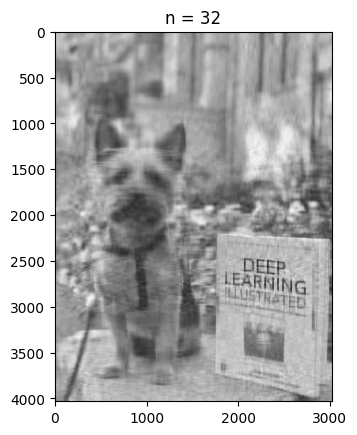

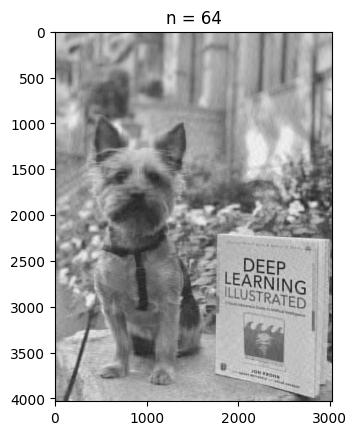

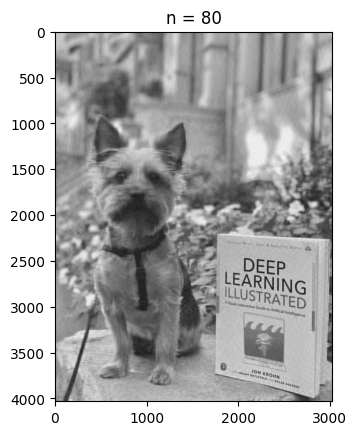

In [7]:
for i in [2, 4, 8, 16, 32, 64, 80]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [8]:
print("image shape: ",imgmat.shape)
full_representation = 4032*3024
print("image full representation: ",full_representation)
svd64_rep = 64*4032 + 64 + 64*3024
print("image svd representation: ",svd64_rep)

image shape:  (4032, 3024)
image full representation:  12192768
image svd representation:  451648


# 2.Write python code to find top two principal components for Iris dataset

In [9]:
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [10]:
iris = load_iris()
iris = datasets.load_iris()
print("shape: ",iris.data.shape)

shape:  (150, 4)


In [11]:
print("feature_name: ")
iris.get("feature_names")

feature_name: 


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [13]:
pca = PCA(n_components=2)           # Create a PCA object with two components
X = pca.fit_transform(iris.data)    # Transform the dataset using the fitted PCA model
pca.fit(iris.data)                  # Fit the PCA model to the dataset
print("shape after PCA: ",X.shape)

shape after PCA:  (150, 2)


In [14]:
print("After PCA")
X[0:6,:]

After PCA


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

In [15]:
print("Top three principal components:\n", pca.components_[:3])

Top three principal components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


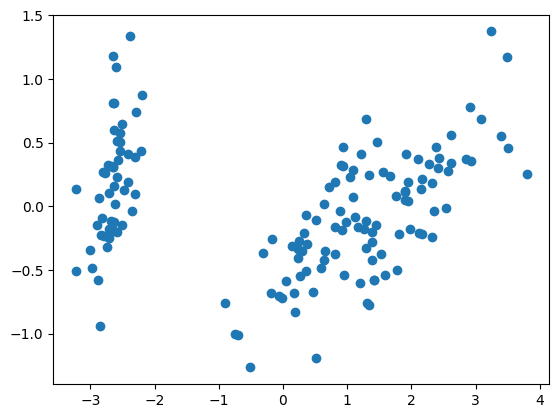

In [16]:
_ = plt.scatter(X[:, 0], X[:, 1])

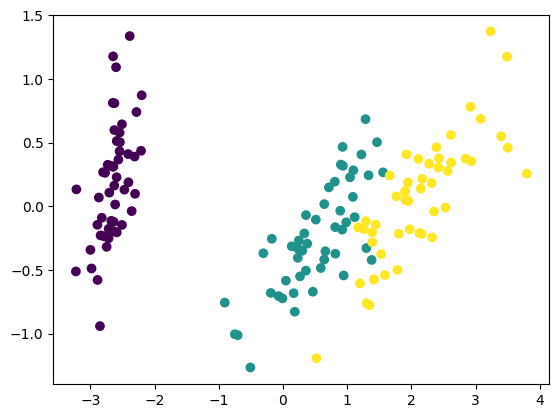

In [17]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)

# 3.Write python code for Face Recognition Using Eigenfaces


In [18]:
from sklearn.datasets import fetch_lfw_people

In [ ]:
# Load the Labeled Faces
lfw_data = fetch_lfw_people(min_faces_per_person=70)

In [ ]:
n_samples, height, width = lfw_data.images.shape
n_pixels = height*width

In [ ]:
# Extract the images and target labels
X = lfw_data.data
n_features=X.shape[1]

y = lfw_data.target
target_names = lfw_data.target_names
n_classes = target_names.shape[0]

In [ ]:
print(f"Image size     = {height} x {width} = {n_pixels} pixels")
print(f"Number faces   = {n_samples}")
print(f"Number classes = {n_classes}")

In [ ]:
def plt_face(x):
    h = 62
    w = 47
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)

In [ ]:
plt_face(X[1100])
plt.title(target_names[y[1100]])

In [ ]:
faces = lfw_data.data
labels = lfw_data.target

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i].reshape(62, 47), cmap='gray')
    ax.set_title(lfw_data.target_names[labels[i]])

In [ ]:
 # Normalize the pixel values to be between 0 and 1
faces = faces / 255.0

In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=150)
pca.fit(faces)
faces_pca = pca.transform(faces)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(faces_pca, labels, test_size=0.2)

In [ ]:
# Train a k-nearest neighbors classifier on the training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)

# Train and evaluate the Support Vector Machine classifier
svm = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Train and evaluate the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f'K-Nearest Neighbors Classifier Accuracy: {accuracy*100}%')
print(f'Support Vector Machine Classifier Accuracy: {accuracy*100}%')
print(f'Random Forest Classifier Accuracy: {accuracy*100}%')

# 4.Write python code to implement LDA classifier on wine dataset

In [ ]:
# Load the Wine dataset
wine = load_wine()
wine

In [ ]:
# Extract the features and target labels from the dataset
X = wine.data
y = wine.target

In [ ]:
X

In [ ]:
y

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform LDA on the training set to extract the most important features
wine_lda = LinearDiscriminantAnalysis(n_components=2)
wine_lda.fit(X_train, y_train)
X_train_lda = wine_lda.transform(X_train)
X_test_lda = wine_lda.transform(X_test)

In [ ]:
print(X_train_lda.shape)
print(X_train_lda)

In [ ]:
print(X_test_lda.shape)
print(X_test_lda)

In [ ]:
# Train a classifier on the training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)

In [ ]:
# Predict the labels of the test set using the trained classifier
y_pred = knn.predict(X_test_lda)
y_pred

In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of classifier:", accuracy)

In [ ]:
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train)
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, marker='x')
plt.legend(['Training data', 'Test data'])
plt.title('LDA projection of face dataset')
plt.show()